In [3]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime

# removes warnings
import warnings
warnings.filterwarnings('ignore')
#suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format 

# Use plain formatting for tick labels 
import matplotlib.pyplot as plt
import seaborn as sns

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)

In [4]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv
from datetime import datetime, timedelta

load_dotenv()

db_config = {
    'dbname': os.getenv('DB_NAME'),
    'user': os.getenv('DB_USER'),
    'password': os.getenv('DB_PASSWORD'),
    'host': os.getenv('DB_HOST'),
    'port': int(os.getenv('DB_PORT'))
}

# Create a connection string for SQLAlchemy
connection_string = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"

# Create SQLAlchemy engine
engine = create_engine(connection_string)

In [5]:
performance_df= pd.read_sql_query("""
                               SELECT * FROM performance""",con=engine )

In [6]:
performance_df[performance_df['player']=='Antony']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec
115,anton_000224,12,4,462,5.20,2,2,4,2,0,0,1,1,1.60,1.60,1.00,2.60,16,23,38,1.12,1.16,0,Antony,"Manchester Utd, Betis","eng Premier League, es La Liga",000224,12,5,5,6,1,9,20.00,7,8,8,6,18,3,1,16,8,50.00,3.31,1.65,0.10,0.20,16.65,0,0.12,0.40,0.40,191,80.30,2552,628,0.60,1.00,12,9,16,3,330,3,23,330,7,36.95,11,58.50,197,16,6,17,7,238


In [5]:
standard_df= pd.read_sql_query("""
                               SELECT * FROM standard""",con=engine )

defense_df = pd.read_sql_query(""" 
                               SELECT * FROM DEFENSE """, con= engine)

shooting_df = pd.read_sql_query(""" 
                               SELECT * FROM SHOOTING """, con= engine)

passing_df = pd.read_sql_query(""" 
                               SELECT * FROM PASSING """, con= engine)

possession_df = pd.read_sql_query(""" 
                               SELECT * FROM POSSESSION """, con= engine)

In [7]:
performance_df[performance_df['player']=='Max Aarons']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec
0,aaron_000104,4,1,117,1.30,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1,10,6,0.00,0.00,0,Max Aarons,"Bournemouth, Valencia","eng Premier League, es La Liga",000104,3,3,1,2,0,2,100.00,0,4,3,1,4,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,64,78.60,1109,409,0.00,0.00,0,9,0,0,97,2,0,97,1,25.00,1,25.00,51,0,0,2,1,51


In [8]:
performance_df.head()

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec
0,aaron_000104,4,1,117,1.30,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1,10,6,0.00,0.00,0,Max Aarons,"Bournemouth, Valencia","eng Premier League, es La Liga",000104,3,3,1,2,0,2,100.00,0,4,3,1,4,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,64,78.60,1109,409,0.00,0.00,0,9,0,0,97,2,0,97,1,25.00,1,25.00,51,0,0,2,1,51
1,abaja_030512,1,1,65,0.70,0,0,0,0,0,0,1,0,0.10,0.10,0.00,0.10,3,2,3,0.00,0.10,0,Rodrigo Abajas,Valencia,es La Liga,030512,3,2,2,1,0,3,100.00,0,1,1,1,4,0,0,1,0,0.00,1.38,0.00,0.00,0.00,24.50,0,0.07,-0.10,-0.10,17,58.60,268,110,0.00,0.00,0,0,0,0,36,1,1,36,1,100.00,0,0.00,13,2,1,0,2,16
2,abank_040116,6,0,88,1.00,0,0,0,0,0,0,1,0,0.10,0.10,0.00,0.10,3,4,1,0.00,0.06,0,James Abankwah,Udinese,it Serie A,040116,4,2,4,0,0,3,66.70,1,2,1,1,5,3,0,1,0,0.00,1.02,0.00,0.00,0.00,15.00,0,0.06,-0.10,-0.10,36,78.30,614,206,0.00,0.00,0,2,0,0,65,8,2,65,0,0.00,0,0.00,29,1,1,1,3,34
3,abdal_060405,1,0,3,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1,0,0,0.00,0.00,0,Keyliane Abdallah,Marseille,fr Ligue 1,060405,1,1,1,0,0,1,100.00,0,0,0,0,1,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,2,100.00,41,0,0.00,0.00,0,0,0,0,4,0,0,4,0,0.00,0,0.00,1,0,0,1,0,3
4,abdel_870928,12,11,976,10.80,0,0,0,0,0,0,2,0,0.20,0.20,0.10,0.40,4,22,3,0.00,0.03,0,Yunis Abdelhamid,Saint-Étienne,fr Ligue 1,870928,17,11,15,2,0,16,62.50,6,24,7,13,30,56,1,2,1,50.00,0.18,0.09,0.00,0.00,10.80,0,0.12,-0.20,-0.20,432,86.70,7860,2367,0.30,-0.10,2,27,0,0,630,124,7,630,3,50.00,3,50.00,319,1,0,8,3,390


In [9]:
def convert_to_date(yy_mm_dd):
    """Convert YYMMDD format (e.g., '000103') to YYYY-MM-DD (e.g., '2000-01-03')."""
    if pd.isna(yy_mm_dd) or not isinstance(yy_mm_dd, str) or len(yy_mm_dd) != 6:
        return None  # Return None for invalid values

    year = int(yy_mm_dd[:2])
    month = int(yy_mm_dd[2:4])
    day = int(yy_mm_dd[4:])

    # Handle century logic: 00-29 → 2000s, 30-99 → 1900s
    year = 2000 + year if year < 30 else 1900 + year

    return f"{year:04d}-{month:02d}-{day:02d}"  # Ensure YYYY-MM-DD format


# Ensure 'birth_date' in performance_df is also in the same format
performance_df['birth_date'] = performance_df['birth_date'].astype(str)  # Convert to string if needed
performance_df['born_date'] = performance_df['birth_date'].apply(convert_to_date)


##### Performace dataframe to sql

In [156]:
performance_df.to_sql(name = 'performance',con = engine, if_exists = 'replace',index = False)

59

In [65]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime

# Headers to mimic a real browser request
HEADERS = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

# Function to get player profile URL
def get_player_profile_url(player_name):
    """Search for a player on Transfermarkt and get their profile URL."""
    search_url = f"https://www.transfermarkt.co.uk/schnellsuche/ergebnis/schnellsuche?query={player_name.replace(' ', '+')}"
    
    try:
        response = requests.get(search_url, headers=HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract player profile URL
        first_result = soup.select_one('a[href*="/profil/spieler/"]')
        if first_result and "href" in first_result.attrs:
            return "https://www.transfermarkt.co.uk" + first_result['href']
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL for {player_name}: {e}")

    return None  # Return None if not found

# Function to generate a unique ID for a player
def generate_unique_id(last_name, date_of_birth):
    """Generate a unique ID for a player using their last name (first 5 lowercase chars) and date of birth in YYMMDD format."""
    # Format last name and date of birth
    last_name_part = last_name.lower()[:5]
    dob_part = str(date_of_birth).zfill(6)  # Ensure date_of_birth is always 6 digits
    
    # Combine features into a unique string
    unique_id = f"{last_name_part}_{dob_part}"
    return unique_id

# Function to scrape contract expiry, position, market value, height, current club, and date of birth
def get_player_details(player_url):
    """Scrape the player's details from their profile page."""
    if not player_url:
        return None  # Skip if no profile URL found

    try:
        response = requests.get(player_url, headers=HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")

        # Extract player name
        player_name = None
        name_element = soup.select_one('h1.data-header__headline-wrapper')
        if name_element:
            player_name = name_element.text.split('\n')[-1].strip()
            last_name = player_name.split()[-1] if player_name else "unknown"
        else:
            last_name = "unknown"

        # Extract contract expiry
        contract_expiry = None
        contract_label = soup.find(text=re.compile("Contract expires"))
        if contract_label:
            contract_expiry = contract_label.find_next().get_text(strip=True)

        # Extract main position
        main_position = None
        position_element = soup.select_one('.detail-position')
        if position_element:
            match = re.search(r"Main position:(.*?)Other position:", position_element.get_text(strip=True))
            if match:
                main_position = match.group(1).strip()
            else:
                main_position = position_element.get_text(strip=True).replace("Main position:", "").strip()

        # Extract market value
        market_value = None
        market_value_element = soup.select_one('a.data-header__market-value-wrapper')
        if market_value_element:
            market_value = market_value_element.get_text(strip=True).split("Last update:")[0].strip()

        # Extract height
        height = None
        height_match = re.search(r"Height:.*?([0-9]+,[0-9]+\s*\w+)", soup.text, re.DOTALL)
        if height_match:
            height = height_match.group(1).strip()

        # Extract current club with fallback for players without a club
        current_club = None
        club_element = soup.select_one('span.data-header__club a') or soup.select_one('span.data-header__no-club')
        if club_element:
            current_club = club_element.get_text(strip=True)
        else:
            current_club = "No Club"

      # Extract league information - updated selector
        league = None
        league_element = soup.select_one('.data-header__league a')
        if league_element:
            league = league_element.get_text(strip=True)
        else:
            # Fallback in case the first selector doesn't work
            league_element = soup.select_one('.data-header__league')
            if league_element:
                league = league_element.get_text(strip=True)

        # Extract date of birth with enhanced error handling
        date_of_birth = None
        dob_label = soup.find(text=re.compile("Date of birth", re.IGNORECASE))
        if dob_label:
            date_text = dob_label.find_next().get_text(strip=True)
            # Clean up the date text to only include the date part
            cleaned_date = re.sub(r'\s*\(.*\)', '', date_text).strip()  # Remove everything in parentheses
            try:
                dob = datetime.strptime(cleaned_date, '%b %d, %Y')
                date_of_birth = dob.strftime('%y%m%d')
            except ValueError:
                print(f"Could not parse date of birth for {player_name}: {cleaned_date}")
        else:
            print(f"No date of birth found for {player_name}")

        # Generate unique ID
        unique_id = generate_unique_id(last_name, date_of_birth)

        # Return all scraped data as a dictionary
        return {
            'player_id': unique_id,
            'player': player_name,
            'contract_expiry': contract_expiry,
            'main_position': main_position,
            'value': market_value,
            'height': height,
            'current_club': current_club,
            'date_of_birth': date_of_birth,
            'league':league
        }

    except requests.exceptions.RequestException as e:
        print(f"Error fetching player details for {player_url}: {e}")
        return None

# Function to process a single player
def process_player(player_name):
    """Process a single player: get profile URL and scrape details."""
    player_url = get_player_profile_url(player_name)
    if not player_url:
        print(f"Profile URL not found for {player_name}")
        return None

    player_details = get_player_details(player_url)
    if not player_details:
        print(f"Details not found for {player_name}")
        return None

    return player_details

# Function to create players_data DataFrame
def create_players_data(player_names):
    """Create a DataFrame with player details by scraping Transfermarkt."""
    players_data = []

    # Use ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor(max_workers=5) as executor:  # Adjust max_workers as needed
        futures = [executor.submit(process_player, player_name) for player_name in player_names]

        for future in futures:
            player_details = future.result()
            if player_details:
                players_data.append(player_details)

    # Create DataFrame
    return pd.DataFrame(players_data)

# Example usage
player_names = ['Cole Palmer','Harry Kane','Antony','Max Aarons','Bukayo Saka']
df = create_players_data(player_names)

# Display the DataFrame
print(df.head())

      player_id       player contract_expiry       main_position     value  \
0  palme_020506  Cole Palmer    Jun 30, 2033  Attacking Midfield  €130.00m   
1   kane_930728   Harry Kane    Jun 30, 2027      Centre-Forward   €90.00m   
2  anton_000224       Antony    Jun 30, 2025        Right Winger   €20.00m   
3  aaron_000104   Max Aarons    Jun 30, 2025          Right-Back   €16.00m   
4   saka_010905  Bukayo Saka    Jun 30, 2027        Right Winger  €150.00m   

   height   current_club date_of_birth          league  
0  1,85 m        Chelsea        020506  Premier League  
1  1,88 m  Bayern Munich        930728      Bundesliga  
2  1,72 m     Real Betis        000224          LaLiga  
3  1,77 m       Valencia        000104          LaLiga  
4  1,78 m        Arsenal        010905  Premier League  


aggregate to average : 'sot_pcnt', 'sh_per_90', 'sot_per_90', 'g_per_sh',
       'g_per_sot', 'dist','npxg_per_sh', 'cmp_pcnt', 'succ_pcnt', 'tkld_pcnt'

aggregate to sum : 'mp', 'starts', 'min', 'nineties', 'gls',
       'ast', 'g_plus_a', 'g_minus_pk', 'pk', 'pkatt', 'crdy', 'crdr', 'xg',
       'npxg', 'xag', 'npxg_plus_xag', 'prgc', 'prgp', 'prgr',
       'g_plus_a_minus_pk', 'xg_plus_xag',

In [10]:
performance_df[performance_df['player']=='Bruno Fernandes']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date
785,ferna_940908,26,26,2195,24.40,6,7,13,3,3,3,4,2,8.00,5.60,5.70,11.30,53,219,106,0.41,0.56,0,Bruno Fernandes,Manchester Utd,eng Premier League,940908,59,35,17,30,12,58,39.70,35,23,20,20,79,27,2,65,17,26.20,2.67,0.70,0.05,0.18,21.40,9,0.09,-2.00,-2.60,1205,74.50,21070,7456,5.30,1.30,59,145,52,8,1898,43,63,1895,19,39.60,24,50.00,1092,46,9,29,26,1343,1994-09-08


In [67]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from concurrent.futures import ThreadPoolExecutor
from datetime import datetime
import unicodedata
import os
from tqdm import tqdm  # For progress bar
import logging
import aiohttp
import asyncio

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Headers and session configuration
HEADERS = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

# Cache for storing player URLs and details
player_url_cache = {}
player_details_cache = {}

async def get_player_profile_url(session, player_name, born_date=None):
    """Async function to get player profile URL."""
    # Check cache first
    cache_key = f"{player_name}_{born_date}"
    if cache_key in player_url_cache:
        return player_url_cache[cache_key]

    search_url = f"https://www.transfermarkt.co.uk/schnellsuche/ergebnis/schnellsuche?query={player_name.replace(' ', '+')}"
    
    try:
        async with session.get(search_url, headers=HEADERS) as response:
            if response.status != 200:
                return None
            
            content = await response.text()
            soup = BeautifulSoup(content, "lxml")  # Using lxml parser for better performance
            
            first_result = soup.select_one('a[href*="/profil/spieler/"]')
            if first_result and "href" in first_result.attrs:
                url = "https://www.transfermarkt.co.uk" + first_result['href']
                player_url_cache[cache_key] = url
                return url
                
    except Exception as e:
        logger.error(f"Error fetching URL for {player_name}: {e}")
    
    return None

async def get_player_details(session, player_url):
    """Async function to get player details."""
    if not player_url:
        return None

    # Check cache first
    if player_url in player_details_cache:
        return player_details_cache[player_url]

    try:
        async with session.get(player_url, headers=HEADERS) as response:
            if response.status != 200:
                return None
                
            content = await response.text()
            soup = BeautifulSoup(content, "lxml")

            # Extract all required data (similar to before but optimized)
            data = {}
            
            player_name = None
            name_element = soup.select_one('h1.data-header__headline-wrapper')
            if name_element:
                # Clean up the player name by removing numbers, extra spaces and newlines
                raw_name = name_element.text
                # Remove shirt number if present (e.g., "#3")
                cleaned_name = re.sub(r'#\d+\s*', '', raw_name)
                # Remove any remaining special characters and extra whitespace
                cleaned_name = re.sub(r'[\n\r\t]', ' ', cleaned_name)
                player_name = ' '.join(cleaned_name.split()).strip()
                last_name = player_name.split()[-1] if player_name else "unknown"
            else:
                last_name = "unknown"

            # Contract expiry
            contract_element = soup.find(text=re.compile("Contract expires"))
            contract_expiry = contract_element.find_next().get_text(strip=True) if contract_element else None

            # Position
            position_element = soup.select_one('.detail-position')
            main_position = None
            if position_element:
                match = re.search(r"Main position:(.*?)(?:Other position:|$)", position_element.get_text(strip=True))
                main_position = match.group(1).strip() if match else None

            # Market value
            value_element = soup.select_one('a.data-header__market-value-wrapper')
            market_value = value_element.get_text(strip=True).split("Last update:")[0].strip() if value_element else None

            # Date of birth
            dob_element = soup.find(text=re.compile("Date of birth"))
            date_of_birth = None
            if dob_element:
                date_text = dob_element.find_next().get_text(strip=True)
                cleaned_date = re.sub(r'\s*\(.*\)', '', date_text).strip()
                try:
                    dob = datetime.strptime(cleaned_date, '%b %d, %Y')
                    date_of_birth = dob.strftime('%y%m%d')
                except ValueError:
                    pass

            # Create player details dictionary
            player_details = {
                'player_id': generate_unique_id(last_name, date_of_birth),
                'player': player_name,
                'contract_expiry': contract_expiry,
                'main_position': main_position,
                'value': market_value,
                'height': soup.find(text=re.compile(r"Height:.*?([0-9]+,[0-9]+\s*\w+)")).group(1).strip() if soup.find(text=re.compile(r"Height:.*?([0-9]+,[0-9]+\s*\w+)")) else None,
                'current_club': (soup.select_one('span.data-header__club a') or soup.select_one('span.data-header__no-club')).get_text(strip=True) if soup.select_one('span.data-header__club a') or soup.select_one('span.data-header__no-club') else "No Club",
                'date_of_birth': date_of_birth,
                'league': (soup.select_one('.data-header__league a') or soup.select_one('.data-header__league')).get_text(strip=True) if soup.select_one('.data-header__league a') or soup.select_one('.data-header__league') else None
            }

            # Cache the results
            player_details_cache[player_url] = player_details
            return player_details

    except Exception as e:
        logger.error(f"Error fetching player details for {player_url}: {e}")
        return None

async def process_player_async(session, player_name, born_date):
    """Process a single player asynchronously."""
    # Try original name first
    player_url = await get_player_profile_url(session, player_name, born_date)
    if not player_url:
        # Try reversed name if original fails
        reversed_name = ' '.join(reversed(player_name.split()))
        player_url = await get_player_profile_url(session, reversed_name, born_date)

    if player_url:
        return await get_player_details(session, player_url)
    return None

async def process_chunk_async(player_chunks, born_dates_chunks):
    """Process a chunk of players asynchronously."""
    async with aiohttp.ClientSession() as session:
        tasks = []
        for player_name, born_date in zip(player_chunks, born_dates_chunks):
            tasks.append(process_player_async(session, player_name, born_date))
            
        return await asyncio.gather(*tasks)

async def create_players_data_async(player_names, born_dates, checkpoint_file='scraping_checkpoint.csv'):
    """Create players data asynchronously with checkpointing."""
    
    # Load existing progress
    if os.path.exists(checkpoint_file):
        existing_data = pd.read_csv(checkpoint_file)
        scraped_players = set(existing_data['player'].tolist())
        remaining_indices = [i for i, p in enumerate(player_names) if p not in scraped_players]
        player_names = [player_names[i] for i in remaining_indices]
        born_dates = [born_dates[i] for i in remaining_indices]
        players_data = existing_data.to_dict('records')
        logger.info(f"Resuming scraping: {len(player_names)} players remaining")
    else:
        players_data = []
        logger.info(f"Starting new scraping session: {len(player_names)} players")

    # Process in chunks
    chunk_size = 50
    for i in range(0, len(player_names), chunk_size):
        chunk_players = player_names[i:i + chunk_size]
        chunk_dates = born_dates[i:i + chunk_size]
        
        # Process chunk
        chunk_results = await process_chunk_async(chunk_players, chunk_dates)
        
        # Add successful results to players_data
        players_data.extend([r for r in chunk_results if r is not None])
        
        # Save checkpoint
        pd.DataFrame(players_data).to_csv(checkpoint_file, index=False)
        logger.info(f"Processed {len(players_data)} players total")
        
        # Rate limiting
        await asyncio.sleep(1)

    return pd.DataFrame(players_data)

# Helper functions remain the same
def normalize_player_name(name):
    """Normalize player name by removing accents and special characters."""
    if pd.isna(name):
        return ''
    name = ''.join(c for c in unicodedata.normalize('NFKD', str(name).lower())
                  if not unicodedata.combining(c))
    name = re.sub(r'[^a-z\s-]', '', name)
    return name.replace('-', ' ').strip()

def generate_unique_id(last_name, date_of_birth):
    """Generate a unique ID for a player."""
    last_name_part = last_name.lower()[:5]
    dob_part = str(date_of_birth).zfill(6)
    return f"{last_name_part}_{dob_part}"

# Main execution
def run_scraper():
    """Wrapper function to run the scraper in Jupyter"""
    import nest_asyncio
    import asyncio
    
    # Allow nested event loops in Jupyter
    nest_asyncio.apply()
    
    # Get player names and birth dates
    player_names = performance_df['player'].tolist()
    born_dates = performance_df['born_date'].tolist()
    
    # Run async scraping
    loop = asyncio.get_event_loop()
    transfermarkt_df = loop.run_until_complete(create_players_data_async(player_names, born_dates))
    return transfermarkt_df

# Run the scraper
transfermarkt_df = run_scraper()
print("\nScraping completed successfully!")
      

INFO:__main__:Resuming scraping: 399 players remaining
INFO:__main__:Processed 6399 players total
INFO:__main__:Processed 6446 players total
INFO:__main__:Processed 6492 players total
INFO:__main__:Processed 6534 players total
INFO:__main__:Processed 6575 players total
INFO:__main__:Processed 6614 players total
INFO:__main__:Processed 6660 players total
INFO:__main__:Processed 6707 players total



Scraping completed successfully!


In [69]:
transfermarkt_df.shape

(6707, 9)

In [180]:
transfermarkt_df.to_csv('transfermarkt_df.csv', index=False)

#### Cleaning Transfermarkt 

In [11]:
transfermarkt_df=pd.read_csv('transfermarkt_df.csv')

In [12]:
transfermarkt_df[transfermarkt_df['player'].str.contains('fernandes',case =False)]

,player_id,player,contract_expiry,main_position,value,height,current_club,date_of_birth,league
825,ferna_940908,#8 \n ...,"Jun 30, 2027",Attacking Midfield,€55.00m,"1,79 m",Man Utd,940908,Premier League
830,ferna_040710,#18 \n ...,"Jun 30, 2029",Central Midfield,€15.00m,"1,78 m",Southampton,40710,Premier League
832,ferna_960415,#6 \n ...,"Jun 30, 2025",Defensive Midfield,€3.50m,"1,87 m",Stade Brestois,960415,Ligue 1
3473,ferna_940908,Bruno Fernandes,"Jun 30, 2027",Attacking Midfield,€55.00m,NaN,Man Utd,940908,Premier League
3474,ferna_960415,Edimilson Fernandes,"Jun 30, 2025",Defensive Midfield,€3.50m,NaN,Stade Brestois,960415,Ligue 1
3475,ferna_040710,Mateus Fernandes,"Jun 30, 2029",Central Midfield,€15.00m,NaN,Southampton,40710,Premier League


The dataset is very messy and needs cleaning. It contains duplicate entries and NaN values. A function has been created to combine duplicate records, keeping only proper names and height values.

In [13]:
def combine_rows(group):
    """Combine duplicate rows, keeping proper names and height values"""
    try:
        # Check if there are rows with proper names
        proper_rows = group[~group['player'].str.contains(r'[#\n]', na=False)]
        
        if len(proper_rows) > 0:
            # Get the first row with proper name
            result = proper_rows.iloc[0].copy()
            
            # If this row has no height, try to get height from other rows
            if pd.isna(result['height']):
                height_values = group['height'].dropna()
                if len(height_values) > 0:
                    result['height'] = height_values.iloc[0]
            
            return result
        else:
            # If no proper names found, return the first row
            return group.iloc[0]
            
    except Exception as e:
        print(f"Error processing group: {e}")
        # Return the first row in case of error
        return group.iloc[0]

# Group by player_id and apply the combining function
market_df = transfermarkt_df.groupby('player_id').apply(combine_rows)

# Reset index
market_df = market_df.reset_index(drop=True)

In [14]:
market_df[market_df['player'].str.contains('fernandes',case =False)]

,player_id,player,contract_expiry,main_position,value,height,current_club,date_of_birth,league
769,ferna_040710,Mateus Fernandes,"Jun 30, 2029",Central Midfield,€15.00m,"1,78 m",Southampton,40710,Premier League
771,ferna_940908,Bruno Fernandes,"Jun 30, 2027",Attacking Midfield,€55.00m,"1,79 m",Man Utd,940908,Premier League
772,ferna_960415,Edimilson Fernandes,"Jun 30, 2025",Defensive Midfield,€3.50m,"1,87 m",Stade Brestois,960415,Ligue 1


##### Leagues

This analysis is focused only in the the top 5 leagues in Europe

In [15]:
leagues = market_df['league'].unique()
print(leagues)

['LaLiga' 'Segunda Federación - Gr. III' 'Championship'
 'National 3 - Grp. J' 'Ligue 1' 'Serie A' '1.Division' 'Serie B'
 'Serie C - A' 'Premier League' 'Bundesliga' 'Ligue 2' nan
 'Jupiler Pro League' 'League Two' 'Primera Federación - Gr. II'
 'Libyan Premier League' 'Premier Liga' '2. Bundesliga' 'MLS'
 'Saudi Pro League' 'Süper Lig' 'Chance Liga' 'Serie C - C' 'SuperLiga'
 'LaLiga2' 'Segunda Federación - Gr. V' '3. Liga' 'Primavera 1'
 'Super League' 'Serie C - B' 'Primera Federación - Gr. I' 'Liga Portugal'
 'Saudi First Division League' 'Stars League' 'Championnat National'
 'National 3 - Grp. E' 'Segunda Federación - Gr. IV' 'Premier League 2'
 'Segunda Federación - Gr. I' 'National 3 - Grp. G' 'National 3 - Grp. B'
 'Série A' '1.Lig' 'Premiership' 'National 2 - Grp. B' 'Ekstraklasa'
 'National 3 - Grp. A' 'Allsvenskan' 'UAE Pro League'
 'Primera División Apertura' 'U19 Nachwuchsliga - Liga A'
 'National U19 - Grp. C' 'Eredivisie' 'Regionalliga Südwest'
 'Torneo Apertura' 'Liga

In [16]:
# Define the major leagues we want to keep
major_leagues = ['Serie A', 'Premier League', 'Bundesliga', 'LaLiga', 'Ligue 1']

# Filter the dataframe to only keep rows with those leagues
market_df = market_df[market_df['league'].isin(major_leagues)]

print(market_df['league'].value_counts())

league
Serie A           481
Premier League    463
Bundesliga        423
LaLiga            416
Ligue 1           395
Name: count, dtype: int64


##### Missing Values

In [17]:
market_df.isnull().sum()

player_id           0
player              0
contract_expiry     0
main_position       0
value               5
height             17
current_club        0
date_of_birth       0
league              0
dtype: int64

In [18]:
market_df.shape

(2178, 9)

In [20]:
# Drop rows with missing values
market_df = market_df.dropna()

In [21]:
market_df.shape

(2158, 9)

##### Date of Birth

date_of_birth column need to be cleaned as players born in 2000s have missing leading 0s.

In [25]:
market_df['date_of_birth'].sample(5, random_state=101)

1386    980718
210     971209
465      10129
2433     10530
2116    950705
Name: date_of_birth, dtype: int64

In [26]:
# For 5-digit values, add leading 0 to make it 6 digits
market_df['date_of_birth'] = market_df['date_of_birth'].astype(str).str.zfill(6)
market_df['date_of_birth'].sample(5, random_state=101)


1386    980718
210     971209
465     010129
2433    010530
2116    950705
Name: date_of_birth, dtype: object

##### Clean the other features

The following cleaning steps will be peformed:
1. Converts the [`contract_expiry`]column to datetime objects
2. Calculates the number of days until the contract expiry date from today, clipping negative values to 0.
3. Defines a function to convert market values from strings with currency symbols and units (e.g., '€1.5m') to float values, and applies this function to the [`value`] column.
4. Converts height values from strings in meters (e.g., '1,80 m') to float values in centimeters.

In [27]:
# Import required libraries
import numpy as np
from datetime import datetime

# Convert contract_expiry to datetime
market_df['contract_expiry'] = pd.to_datetime(market_df['contract_expiry'], errors='coerce')

# Calculate days until contract expiry
today = datetime.now()
market_df['days_until_expiry'] = (market_df['contract_expiry'] - today).dt.days
market_df['days_until_expiry'] = market_df['days_until_expiry'].clip(lower=0)

# Convert value to float
def convert_market_value(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace("€", "").replace(",", "").strip()
    if value in ["-", "Not Found"] or value.startswith("Error:"):
        return np.nan
    if "m" in value.lower():
        return float(value.lower().replace("m", "")) * 1_000_000
    elif "k" in value.lower():
        return float(value.lower().replace("k", "")) * 1_000
    return float(value)

market_df['value'] = market_df['value'].apply(convert_market_value)

# Convert height to float in cm
market_df['height'] = market_df['height'].str.replace(',', '.').str.replace(' m', '').apply(lambda x: float(x) if x else None).astype('float64') * 100

# Convert date_of_birth to datetime
market_df['date_of_birth'] = pd.to_datetime(market_df['date_of_birth'], format='%y%m%d', errors='coerce')

# Display Antony's data with the new transformations
print(market_df.head())

       player_id            player contract_expiry       main_position  \
4   abdel_870928  Yunis Abdelhamid      2025-06-30         Centre-Back   
5   abdel_991117     Himad Abdelli      2026-06-30  Attacking Midfield   
6    abdi_931220          Ali Abdi      2027-06-30           Left-Back   
7   abdul_990718   Saud Abdulhamid      2028-06-30          Right-Back   
10  ablin_030328    Matthis Abline      2028-06-30      Centre-Forward   

        value  height   current_club date_of_birth   league  days_until_expiry  
4   500000.00  190.00  Saint-Étienne    1987-09-28  Ligue 1             120.00  
5  5000000.00  185.00     Angers SCO    1999-11-17  Ligue 1             485.00  
6  3000000.00  183.00       OGC Nice    1993-12-20  Ligue 1             850.00  
7  4000000.00  175.00        AS Roma    1999-07-18  Serie A            1216.00  
10 9000000.00  182.00      FC Nantes    2003-03-28  Ligue 1            1216.00  


,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
0,abdel_870928,12,11,976,10.80,0,0,0,0,0,0,2,0,0.20,0.20,0.10,0.40,4,22,3,0.00,0.03,0,Yunis Abdelhamid,Saint-Étienne,fr Ligue 1,870928,17,11,15,2,0,16,62.50,6,24,7,13,30,56,1,2,1,50.00,0.18,0.09,0.00,0.00,10.80,0,0.12,-0.20,-0.20,432,86.70,7860,2367,0.30,-0.10,2,27,0,0,630,124,7,630,3,50.00,3,50.00,319,1,0,8,3,390,1987-09-28,abdel_870928,Yunis Abdelhamid,2025-06-30,Centre-Back,500000.00,190.00,Saint-Étienne,1987-09-28,Ligue 1,120.00
1,abdel_991117,22,22,1952,21.70,6,1,7,3,3,4,2,0,5.50,2.30,2.80,5.10,80,147,90,0.18,0.38,0,Himad Abdelli,Angers,fr Ligue 1,991117,34,24,8,14,12,30,36.70,19,13,13,16,50,16,1,21,6,28.60,0.97,0.28,0.14,0.50,24.20,0,0.11,0.50,0.70,993,82.10,15048,4044,2.70,-1.80,29,114,27,1,1426,18,40,1422,41,47.10,44,50.60,840,61,16,37,31,1052,1999-11-17,abdel_991117,Himad Abdelli,2026-06-30,Attacking Midfield,5000000.00,185.00,Angers SCO,1999-11-17,Ligue 1,485.00
2,abdi_931220,15,11,931,10.30,2,2,4,2,0,0,1,0,1.20,1.20,1.40,2.60,26,29,58,0.39,0.25,0,Ali Abdi,Nice,fr Ligue 1,931220,24,16,10,8,6,30,63.30,11,17,13,11,35,28,0,16,5,31.30,1.55,0.48,0.13,0.40,19.80,0,0.07,0.80,0.80,319,73.80,5039,1729,1.20,0.60,13,11,13,3,563,39,30,563,7,46.70,8,53.30,230,9,8,19,10,305,1993-12-20,abdi_931220,Ali Abdi,2027-06-30,Left-Back,3000000.00,183.00,OGC Nice,1993-12-20,Ligue 1,850.00
3,abdul_990718,3,1,142,1.60,0,1,1,0,0,0,0,0,0.00,0.00,0.10,0.10,4,6,18,0.63,0.09,0,Saud Abdulhamid,Roma,it Serie A,990718,2,1,1,0,1,1,100.00,0,1,1,1,3,0,0,1,0,0.00,0.63,0.00,0.00,0.00,24.70,0,0.03,0.00,0.00,77,89.50,1142,226,0.20,0.90,1,3,2,1,97,0,3,97,2,40.00,1,20.00,62,0,1,2,1,72,1999-07-18,abdul_990718,Saud Abdulhamid,2028-06-30,Right-Back,4000000.00,175.00,AS Roma,1999-07-18,Serie A,1216.00
4,ablin_030328,23,22,1831,20.30,7,1,8,6,1,1,2,0,7.00,6.30,2.70,8.90,48,33,119,0.34,0.48,0,Matthis Abline,Nantes,fr Ligue 1,030328,8,3,2,2,4,8,25.00,6,10,10,2,10,26,1,56,22,39.30,2.75,1.08,0.11,0.27,14.10,0,0.11,0.00,-0.30,257,71.00,3770,671,2.70,-1.70,19,16,14,4,605,24,106,604,28,42.40,36,54.50,410,30,29,68,43,473,2003-03-28,ablin_030328,Matthis Abline,2028-06-30,Centre-Forward,9000000.00,182.00,FC Nantes,2003-03-28,Ligue 1,1216.00


In [60]:
del merged_df 

In [50]:
market_df.columns

Index(['player_id', 'player', 'contract_expiry', 'main_position', 'value',
       'height', 'current_club', 'date_of_birth', 'league',
       'days_until_expiry'],
      dtype='object')

In [93]:
del final_merged_df

In [94]:
import pandas as pd

# Convert born_date in performance_df to datetime
performance_df['born_date'] = pd.to_datetime(performance_df['born_date'], errors='coerce')

# Convert date_of_birth in market_df to datetime
market_df['date_of_birth'] = pd.to_datetime(market_df['date_of_birth'], errors='coerce')

# Initial merge on unique_id and player_id using inner join
merged_df = pd.merge(performance_df, market_df, how='inner', left_on='unique_id', right_on='player_id')

# Identify unmatched rows in performance_df and market_df
unmatched_performance = performance_df[~performance_df['unique_id'].isin(merged_df['unique_id'])]
unmatched_market = market_df[~market_df['player_id'].isin(merged_df['player_id'])]

# Secondary merge on current_club and squad, and date_of_birth and born_date for unmatched rows
secondary_merged_df = pd.merge(unmatched_performance, unmatched_market, how='inner', left_on=['squad', 'born_date'], right_on=['current_club', 'date_of_birth'])

# Combine matched and secondary merged DataFrames
merged_df = pd.concat([merged_df, secondary_merged_df], ignore_index=True)

# Drop duplicate columns and rename if necessary
#merged_df = merged_df.drop(columns=['date_of_birth', 'current_club'])
#merged_df = merged_df.rename(columns={'born_date': 'date_of_birth'})

# Print the shape of the final merged DataFrame
print(merged_df.shape)

(2068, 88)


In [96]:
# Get the count of missing values for each column
missing_values = merged_df.isnull().sum()

# Filter columns with missing values greater than 0
missing_columns = values[missing_values > 0]

# Display the column names and the count of missing values
print(missing_columns)

NameError: name 'values' is not defined

In [99]:
# Filter records with missing information
missing_info_df = merged_df[merged_df.isnull().any(axis=1)]

# Select only the specified columns
missing_info_df = missing_info_df[['player_x', 'player_y','squad','current_club', 'league', 'value']]

# Display the filtered DataFrame
print(missing_info_df)

             player_x         player_y          squad   current_club  \
14       Junior Adamu     Junior Adamu       Freiburg    SC Freiburg   
33     Erik Ahlstrand   Erik Ahlstrand      St. Pauli   FC St. Pauli   
49     Andreas Albers   Andreas Albers      St. Pauli   FC St. Pauli   
102      Noah Atubolu     Noah Atubolu       Freiburg    SC Freiburg   
143       Scott Banks      Scott Banks      St. Pauli   FC St. Pauli   
...               ...              ...            ...            ...   
1929  Mitchell Weiser  Mitchell Weiser  Werder Bremen  Werder Bremen   
1932        Welington        Welington    Southampton    Southampton   
2020       Amar Dedić       Amar Dedic      Marseille      Marseille   
2043       Ivan Nekić       Ivan Nekic  Holstein Kiel  Holstein Kiel   
2051  Frederik Rønnow  Frederik Rönnow   Union Berlin   Union Berlin   

              league       value  
14        Bundesliga  6000000.00  
33        Bundesliga   700000.00  
49        Bundesliga   300000.

In [114]:
merged_df[merged_df['player_x']=='Vinícius Júnior']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry


In [109]:
performance_df[performance_df['unique_id']=='gimén_010418']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date
885,gimén_010418,3,2,213,2.40,2,0,2,2,0,0,2,0,1.40,1.40,0.30,1.70,6,1,15,0.85,0.73,0,Santiago Giménez,Milan,it Serie A,010418,1,1,0,1,0,0,0.00,0,2,1,1,2,6,0,8,3,37.50,3.38,1.27,0.25,0.67,14.80,0,0.18,0.60,0.60,29,78.40,338,51,0.20,-0.30,2,0,0,0,66,6,9,66,2,28.60,5,71.40,36,2,2,5,1,42,2001-04-18


In [116]:
merged_df[merged_df['player'] == 'Vinícius Júnior']

KeyError: 'player'

In [104]:
merged_df[merged_df['player_x'] == 'Santiago Gimenez']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry


In [77]:
final_merged_df.head()

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,date_of_birth,player_id,player_y,contract_expiry,main_position,value,height,league,days_until_expiry
0,abdel_870928,12,11,976,10.80,0,0,0,0,0,0,2,0,0.20,0.20,0.10,0.40,4,22,3,0.00,0.03,0,Yunis Abdelhamid,Saint-Étienne,fr Ligue 1,870928,17,11,15,2,0,16,62.50,6,24,7,13,30,56,1,2,1,50.00,0.18,0.09,0.00,0.00,10.80,0,0.12,-0.20,-0.20,432,86.70,7860,2367,0.30,-0.10,2,27,0,0,630,124,7,630,3,50.00,3,50.00,319,1,0,8,3,390,1987-09-28,abdel_870928,Yunis Abdelhamid,2025-06-30,Centre-Back,500000.00,190.00,Ligue 1,120.00
1,abdel_991117,22,22,1952,21.70,6,1,7,3,3,4,2,0,5.50,2.30,2.80,5.10,80,147,90,0.18,0.38,0,Himad Abdelli,Angers,fr Ligue 1,991117,34,24,8,14,12,30,36.70,19,13,13,16,50,16,1,21,6,28.60,0.97,0.28,0.14,0.50,24.20,0,0.11,0.50,0.70,993,82.10,15048,4044,2.70,-1.80,29,114,27,1,1426,18,40,1422,41,47.10,44,50.60,840,61,16,37,31,1052,1999-11-17,abdel_991117,Himad Abdelli,2026-06-30,Attacking Midfield,5000000.00,185.00,Ligue 1,485.00
2,abdi_931220,15,11,931,10.30,2,2,4,2,0,0,1,0,1.20,1.20,1.40,2.60,26,29,58,0.39,0.25,0,Ali Abdi,Nice,fr Ligue 1,931220,24,16,10,8,6,30,63.30,11,17,13,11,35,28,0,16,5,31.30,1.55,0.48,0.13,0.40,19.80,0,0.07,0.80,0.80,319,73.80,5039,1729,1.20,0.60,13,11,13,3,563,39,30,563,7,46.70,8,53.30,230,9,8,19,10,305,1993-12-20,abdi_931220,Ali Abdi,2027-06-30,Left-Back,3000000.00,183.00,Ligue 1,850.00
3,abdul_990718,3,1,142,1.60,0,1,1,0,0,0,0,0,0.00,0.00,0.10,0.10,4,6,18,0.63,0.09,0,Saud Abdulhamid,Roma,it Serie A,990718,2,1,1,0,1,1,100.00,0,1,1,1,3,0,0,1,0,0.00,0.63,0.00,0.00,0.00,24.70,0,0.03,0.00,0.00,77,89.50,1142,226,0.20,0.90,1,3,2,1,97,0,3,97,2,40.00,1,20.00,62,0,1,2,1,72,1999-07-18,abdul_990718,Saud Abdulhamid,2028-06-30,Right-Back,4000000.00,175.00,Serie A,1216.00
4,ablin_030328,23,22,1831,20.30,7,1,8,6,1,1,2,0,7.00,6.30,2.70,8.90,48,33,119,0.34,0.48,0,Matthis Abline,Nantes,fr Ligue 1,030328,8,3,2,2,4,8,25.00,6,10,10,2,10,26,1,56,22,39.30,2.75,1.08,0.11,0.27,14.10,0,0.11,0.00,-0.30,257,71.00,3770,671,2.70,-1.70,19,16,14,4,605,24,106,604,28,42.40,36,54.50,410,30,29,68,43,473,2003-03-28,ablin_030328,Matthis Abline,2028-06-30,Centre-Forward,9000000.00,182.00,Ligue 1,1216.00


In [82]:
final_merged_df[final_merged_df['player_y']=='Heung-min Son']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,date_of_birth,player_id,player_y,contract_expiry,main_position,value,height,league,days_until_expiry
2029,heung_920708,24,21,1768,19.60,6,9,15,6,0,1,1,0,5.70,4.90,7.90,12.80,77,89,223,0.76,0.69,0,Son Heung-min,Tottenham,eng Premier League,920708,16,9,3,8,5,20,25.00,15,8,8,4,20,16,1,48,23,47.90,2.44,1.17,0.13,0.26,17.20,1,0.10,0.30,1.10,617,79.40,8617,2232,4.70,1.10,45,30,43,5,959,14,103,958,27,37.50,35,48.60,636,40,34,25,23,738,1992-07-08,son_920708,Heung-min Son,2026-06-30,Left Winger,38000000.00,184.00,Premier League,485.00


In [79]:
final_merged_df[final_merged_df['player_id']=='son_920708']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,date_of_birth,player_id,player_y,contract_expiry,main_position,value,height,league,days_until_expiry
2029,heung_920708,24,21,1768,19.60,6,9,15,6,0,1,1,0,5.70,4.90,7.90,12.80,77,89,223,0.76,0.69,0,Son Heung-min,Tottenham,eng Premier League,920708,16,9,3,8,5,20,25.00,15,8,8,4,20,16,1,48,23,47.90,2.44,1.17,0.13,0.26,17.20,1,0.10,0.30,1.10,617,79.40,8617,2232,4.70,1.10,45,30,43,5,959,14,103,958,27,37.50,35,48.60,636,40,34,25,23,738,1992-07-08,son_920708,Heung-min Son,2026-06-30,Left Winger,38000000.00,184.00,Premier League,485.00


In [40]:
market_df[market_df['player_id']=='son_920708']

,player_id,player,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
2154,son_920708,Heung-min Son,2026-06-30,Left Winger,38000000.00,184.00,Tottenham,1992-07-08,Premier League,485.00


In [37]:
performance_df[performance_df['unique_id']=='heung_920708']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date
1031,heung_920708,24,21,1768,19.60,6,9,15,6,0,1,1,0,5.70,4.90,7.90,12.80,77,89,223,0.76,0.69,0,Son Heung-min,Tottenham,eng Premier League,920708,16,9,3,8,5,20,25.00,15,8,8,4,20,16,1,48,23,47.90,2.44,1.17,0.13,0.26,17.20,1,0.10,0.30,1.10,617,79.40,8617,2232,4.70,1.10,45,30,43,5,959,14,103,958,27,37.50,35,48.60,636,40,34,25,23,738,1992-07-08


In [33]:
df[df['player_y']=='Son Heung-min']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry


In [41]:
# Check some sample IDs from both dataframes
print("\nSample unique_ids from performance_df:")
print(performance_df['unique_id'].head(10))

print("\nSample player_ids from market_df:")
print(market_df['player_id'].head(10))

# Check if any IDs match exactly
common_ids = set(performance_df['unique_id']).intersection(set(market_df['player_id']))
print("\nNumber of matching IDs:", len(common_ids))
if len(common_ids) > 0:
    print("Sample of matching IDs:", list(common_ids)[:5])


Sample unique_ids from performance_df:
0    aaron_000104
1    abaja_030512
2    abank_040116
3    abdal_060405
4    abdel_870928
5    abdel_990201
6    abdel_991117
7     abdi_931220
8    abdul_990718
9     abel_000821
Name: unique_id, dtype: object

Sample player_ids from market_df:
4     abdel_870928
5     abdel_991117
6      abdi_931220
7     abdul_990718
10    ablin_030328
11    abner_000527
12    abouk_000218
13    abqar_990310
14    abrah_971002
16    acerb_880210
Name: player_id, dtype: object

Number of matching IDs: 2015
Sample of matching IDs: ['saele_990627', 'lumle_950215', 'chalo_990705', 'domín_980628', 'ndour_040727']


In [42]:
# First, let's check the column names in both dataframes
print("Performance DF columns:", performance_df.columns.tolist())
print("\nMarket DF columns:", market_df.columns.tolist())

# Perform the merge
merged_df = performance_df.merge(
    market_df,
    left_on='unique_id',
    right_on='player_id',
    how='inner',
    suffixes=('_x', '_y')  # Add suffixes to distinguish duplicate column names
)

# Print merge results
print("\nShape of performance_df:", performance_df.shape)
print("Shape of market_df:", market_df.shape)
print("Shape of merged_df:", merged_df.shape)

# Verify the merge with some example players
print("\nSample of merged records:")
print(merged_df[['unique_id', 'player_id', 'player_x', 'current_club', 'value']].head())

# Check specific players to verify correct matching
for player in ['Antony', 'Bruno Fernandes']:
    print(f"\nChecking {player}:")
    print(merged_df[merged_df['player_x'] == player][['unique_id', 'player_id', 'player_x', 'current_club', 'value']])

Performance DF columns: ['unique_id', 'mp', 'starts', 'min', 'nineties', 'gls', 'ast', 'g_plus_a', 'g_minus_pk', 'pk', 'pkatt', 'crdy', 'crdr', 'xg', 'npxg', 'xag', 'npxg_plus_xag', 'prgc', 'prgp', 'prgr', 'g_plus_a_minus_pk', 'xg_plus_xag', 'matches', 'player', 'squad', 'comp', 'birth_date', 'tkl', 'tklw', 'def_3rd', 'mid_3rd', 'att_3rd', 'att', 'tkl_pcnt', 'lost', 'blocks', 'pass', 'int', 'tkl_plus_int', 'clr', 'err', 'sh', 'sot', 'sot_pcnt', 'sh_per_90', 'sot_per_90', 'g_per_sh', 'g_per_sot', 'dist', 'fk', 'npxg_per_sh', 'g_minus_xg', 'np:g_minus_xg', 'cmp', 'cmp_pcnt', 'totdist', 'prgdist', 'xa', 'a_minus_xag', 'kp', 'pass_into_final_third', 'ppa', 'crspa', 'touches', 'def_pen', 'att_pen', 'live', 'succ', 'succ_pcnt', 'tkld', 'tkld_pcnt', 'carries', 'carries_into_final_third', 'cpa', 'mis', 'dis', 'rec', 'born_date']

Market DF columns: ['player_id', 'player', 'contract_expiry', 'main_position', 'value', 'height', 'current_club', 'date_of_birth', 'league', 'days_until_expiry']

Sha

In [43]:
merged_df.sample(5)

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
9,acerb_880210,12,12,940,10.40,0,1,1,0,0,0,0,0,0.30,0.30,0.30,0.70,8,39,6,0.10,0.06,0,Francesco Acerbi,Inter,it Serie A,880210,12,9,8,4,0,7,71.40,2,12,4,18,30,44,0,4,1,25.00,0.38,0.10,0.00,0.00,11.20,0,0.08,-0.30,-0.30,715,94.00,13494,3877,0.50,0.70,4,32,3,2,861,78,11,861,1,100.00,0,0.00,551,9,0,3,1,652,1988-02-10,acerb_880210,Francesco Acerbi,2026-06-30,Centre-Back,3000000.00,192.00,Inter,1988-02-10,Serie A,485.00
1923,watki_951230,28,24,1965,21.80,12,6,18,10,2,2,0,0,13.30,11.70,2.70,14.40,40,19,123,0.73,0.73,0,Ollie Watkins,Aston Villa,eng Premier League,951230,6,4,0,4,2,7,14.30,6,11,8,6,12,9,1,66,28,42.40,3.02,1.28,0.15,0.36,12.00,0,0.18,-1.30,-1.70,237,75.50,2960,475,1.50,3.30,20,9,7,0,522,12,132,520,8,22.90,24,68.60,318,18,27,40,40,418,1995-12-30,watki_951230,Ollie Watkins,2028-06-30,Centre-Forward,55000000.00,180.00,Aston Villa,1995-12-30,Premier League,1216.00
989,labro_991010,15,15,1350,15.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0,0,0,0.00,0.00,0,Nediljko Labrović,Augsburg,de Bundesliga,991010,0,0,0,0,0,0,0.00,0,0,0,0,0,12,1,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,354,70.20,10392,7820,0.10,0.00,0,10,1,0,546,451,0,546,0,0.00,0,0.00,306,0,0,0,0,238,1999-10-10,labro_991010,Nediljko Labrovic,2029-06-30,Goalkeeper,4500000.00,196.00,FC Augsburg,1999-10-10,Bundesliga,1581.00
133,baleb_040103,23,21,1777,19.70,2,1,3,2,0,0,7,1,2.40,2.40,0.90,3.40,32,89,22,0.15,0.17,0,Carlos Baleba,Brighton,eng Premier League,040103,54,29,16,27,11,50,66.00,17,29,24,36,90,24,1,34,9,26.50,1.72,0.46,0.06,0.22,24.80,1,0.07,-0.40,-0.40,694,87.20,11843,3177,0.90,0.10,16,83,19,1,1056,52,9,1056,24,58.50,15,36.60,563,28,2,26,25,619,2004-01-03,baleb_040103,Carlos Baleba,2028-06-30,Defensive Midfield,35000000.00,179.00,Brighton,2004-01-03,Premier League,1216.00
294,caler_950914,10,3,369,4.10,1,0,1,1,0,0,0,0,0.30,0.30,0.00,0.30,0,6,1,0.24,0.07,0,Fernando Calero,Espanyol,es La Liga,950914,7,3,6,1,0,4,75.00,1,8,3,11,18,25,0,2,1,50.00,0.49,0.24,0.50,1.00,9.10,0,0.14,0.70,0.70,134,83.20,2809,1075,0.00,0.00,1,6,0,0,219,35,2,219,0,0.00,0,0.00,94,2,0,3,0,120,1995-09-14,caler_950914,Fernando Calero,2026-06-30,Centre-Back,1500000.00,184.00,Espanyol,1995-09-14,LaLiga,485.00


In [88]:
merged_df.duplicated().sum()

0

In [90]:
merged_df.isnull().sum()

unique_id             0
mp                    0
starts                0
min                   0
nineties              0
                     ..
height                0
current_club          0
date_of_birth         0
league                0
days_until_expiry    86
Length: 88, dtype: int64

In [136]:
merged_df.to_csv('merged_df.csv', index=False)

In [117]:
import pandas as pd

# Convert born_date in performance_df to datetime
performance_df['born_date'] = pd.to_datetime(performance_df['born_date'], errors='coerce')

# Convert date_of_birth in market_df to datetime
market_df['date_of_birth'] = pd.to_datetime(market_df['date_of_birth'], errors='coerce')

# Initial merge on unique_id and player_id using inner join
merged_df = pd.merge(performance_df, market_df, how='inner', left_on='unique_id', right_on='player_id')

# Identify unmatched rows in performance_df and market_df
unmatched_performance = performance_df[~performance_df['unique_id'].isin(merged_df['unique_id'])]
unmatched_market = market_df[~market_df['player_id'].isin(merged_df['player_id'])]

# Secondary merge on current_club and squad, and date_of_birth and born_date for unmatched rows
secondary_merged_df = pd.merge(unmatched_performance, unmatched_market, how='inner', left_on=['squad', 'born_date'], right_on=['current_club', 'date_of_birth'])

# Combine matched and secondary merged DataFrames
final_merged_df = pd.concat([merged_df, secondary_merged_df], ignore_index=True)

# Drop duplicate columns and rename if necessary
final_merged_df = final_merged_df.drop(columns=['date_of_birth', 'current_club'])
final_merged_df = final_merged_df.rename(columns={'born_date': 'date_of_birth'})

# Print the shape of the final merged DataFrame
print(final_merged_df.shape)

(2068, 86)


In [123]:
final_merged_df[final_merged_df['player_x']=='Vinícius Júnior']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,date_of_birth,player_id,player_y,contract_expiry,main_position,value,height,league,days_until_expiry


In [126]:
import pandas as pd
import unicodedata

# Normalize accented characters in player_id and unique_id columns
performance_df['unique_id'] = performance_df['unique_id'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode() if isinstance(x, str) else x)
market_df['player_id'] = market_df['player_id'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode() if isinstance(x, str) else x)

# Convert born_date in performance_df to datetime
performance_df['born_date'] = pd.to_datetime(performance_df['born_date'], errors='coerce')

# Convert date_of_birth in market_df to datetime
market_df['date_of_birth'] = pd.to_datetime(market_df['date_of_birth'], errors='coerce')

# Initial merge on unique_id and player_id using inner join
merged_df = pd.merge(performance_df, market_df, how='inner', left_on='unique_id', right_on='player_id')

# Identify unmatched rows in performance_df and market_df
unmatched_performance = performance_df[~performance_df['unique_id'].isin(merged_df['unique_id'])]
unmatched_market = market_df[~market_df['player_id'].isin(merged_df['player_id'])]

# Secondary merge on current_club and squad, and date_of_birth and born_date for unmatched rows
secondary_merged_df = pd.merge(unmatched_performance, unmatched_market, how='inner', left_on=['squad', 'born_date'], right_on=['current_club', 'date_of_birth'])

# Combine matched and secondary merged DataFrames
final_merged_df = pd.concat([merged_df, secondary_merged_df], ignore_index=True)

# Drop duplicate columns and rename if necessary
#final_merged_df = final_merged_df.drop(columns=['date_of_birth', 'current_club'])
#final_merged_df = final_merged_df.rename(columns={'born_date': 'date_of_birth'})

# Print the shape of the final merged DataFrame
print(final_merged_df.shape)



(2098, 88)


In [131]:
final_merged_df[final_merged_df['player_y']=='Vinicius Junior']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
913,junio_000712,19,17,1534,17.00,9,5,14,7,2,2,5,1,7.60,6.30,5.30,11.60,115,57,183,0.70,0.76,0,Vinicius Júnior,Real Madrid,es La Liga,000712,16,8,4,3,9,9,33.30,6,5,5,2,18,1,1,59,15,25.40,3.46,0.88,0.12,0.47,17.20,0,0.11,1.40,0.70,441,74.60,6684,1575,4.60,-0.30,37,34,24,3,842,3,139,840,56,43.40,63,48.80,631,55,73,46,37,723,2000-07-12,junio_000712,Vinicius Junior,2027-06-30,Left Winger,200000000.00,176.00,Real Madrid,2000-07-12,LaLiga,850.00


In [146]:
final_merged_df[final_merged_df['player_x']=='Son Heung-min']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
2082,heung_920708,24,21,1768,19.60,6,9,15,6,0,1,1,0,5.70,4.90,7.90,12.80,77,89,223,0.76,0.69,0,Son Heung-min,Tottenham,eng Premier League,920708,16,9,3,8,5,20,25.00,15,8,8,4,20,16,1,48,23,47.90,2.44,1.17,0.13,0.26,17.20,1,0.10,0.30,1.10,617,79.40,8617,2232,4.70,1.10,45,30,43,5,959,14,103,958,27,37.50,35,48.60,636,40,34,25,23,738,1992-07-08,son_920708,Heung-min Son,2026-06-30,Left Winger,38000000.00,184.00,Tottenham,1992-07-08,Premier League,485.00


In [150]:
final_merged_df[final_merged_df['player_x']=='Vinicius Júnior']

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
913,junio_000712,19,17,1534,17.00,9,5,14,7,2,2,5,1,7.60,6.30,5.30,11.60,115,57,183,0.70,0.76,0,Vinicius Júnior,Real Madrid,es La Liga,000712,16,8,4,3,9,9,33.30,6,5,5,2,18,1,1,59,15,25.40,3.46,0.88,0.12,0.47,17.20,0,0.11,1.40,0.70,441,74.60,6684,1575,4.60,-0.30,37,34,24,3,842,3,139,840,56,43.40,63,48.80,631,55,73,46,37,723,2000-07-12,junio_000712,Vinicius Junior,2027-06-30,Left Winger,200000000.00,176.00,Real Madrid,2000-07-12,LaLiga,850.00


In [144]:
import pandas as pd

# Filter the market_df DataFrame for Real Madrid, Man City, and Tottenham
filtered_merged_df = final_merged_df[final_merged_df['current_club'].isin(['Real Madrid', 'Man City', 'Tottenham'])]

# Sort the filtered DataFrame by player value in descending order
sorted_merged_df = filtered_merged_df.sort_values(by='value', ascending=False)

# Group the sorted DataFrame by current club
grouped_merged_df = sorted_merged_df.groupby('current_club')

# Retrieve the top 5 most expensive players from each club
merged_expensive_players = grouped_market_df.head(10)

# Display the result
merged_expensive_players


,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry
913,junio_000712,19,17,1534,17.00,9,5,14,7,2,2,5,1,7.60,6.30,5.30,11.60,115,57,183,0.70,0.76,0,Vinicius Júnior,Real Madrid,es La Liga,000712,16,8,4,3,9,9,33.30,6,5,5,2,18,1,1,59,15,25.40,3.46,0.88,0.12,0.47,17.20,0,0.11,1.40,0.70,441,74.60,6684,1575,4.60,-0.30,37,34,24,3,842,3,139,840,56,43.40,63,48.80,631,55,73,46,37,723,2000-07-12,junio_000712,Vinicius Junior,2027-06-30,Left Winger,200000000.00,176.00,Real Madrid,2000-07-12,LaLiga,850.00
774,haala_000721,26,26,2300,25.60,20,3,23,19,1,2,2,0,19.70,18.10,2.70,20.90,18,17,101,0.86,0.88,0,Erling Haaland,Manchester City,eng Premier League,000721,8,4,2,3,3,6,33.30,4,9,8,4,12,22,0,95,54,56.80,3.72,2.11,0.20,0.35,11.90,1,0.20,0.30,0.90,203,64.90,2480,507,1.70,0.30,25,9,6,1,535,21,162,533,10,35.70,16,57.10,256,14,18,38,24,402,2000-07-21,haala_000721,Erling Haaland,2034-06-30,Centre-Forward,200000000.00,195.00,Man City,2000-07-21,Premier League,3407.00
185,belli_030629,20,20,1628,18.10,7,6,13,6,1,2,3,1,7.80,6.30,2.70,8.90,54,134,93,0.66,0.58,0,Jude Bellingham,Real Madrid,es La Liga,030629,35,21,14,15,6,23,60.90,9,25,23,17,52,14,0,39,14,35.90,2.16,0.77,0.15,0.43,17.10,0,0.16,-0.80,-0.30,923,86.60,14594,3207,2.30,3.30,26,92,20,0,1271,17,68,1269,25,56.80,16,36.40,790,36,11,33,22,1046,2003-06-29,belli_030629,Jude Bellingham,2029-06-30,Attacking Midfield,180000000.00,186.00,Real Madrid,2003-06-29,LaLiga,1581.00
1203,mbapp_981220,23,23,1998,22.20,17,3,20,12,5,6,3,0,16.70,11.90,4.80,16.70,106,97,281,0.68,0.97,0,Kylian Mbappé,Real Madrid,es La Liga,981220,8,5,1,3,4,3,33.30,2,3,3,0,8,0,0,100,51,51.00,4.50,2.30,0.12,0.24,16.70,1,0.12,0.30,0.10,653,83.60,9474,1695,4.60,-1.80,36,57,36,2,1068,0,223,1062,58,43.00,67,49.60,705,59,74,54,29,931,1998-12-20,mbapp_981220,Kylian Mbappé,2029-06-30,Centre-Forward,160000000.00,178.00,Real Madrid,1998-12-20,LaLiga,1581.00
615,foden_000528,22,17,1546,17.20,7,2,9,7,0,0,2,0,4.70,4.70,4.40,9.10,44,90,109,0.52,0.53,0,Phil Foden,Manchester City,eng Premier League,000528,10,4,4,3,3,17,41.20,10,10,9,9,19,7,1,49,16,32.70,2.85,0.93,0.14,0.44,18.70,2,0.10,2.30,2.30,702,84.70,10952,2374,5.00,-2.40,38,39,34,5,1004,12,73,1004,13,36.10,18,50.00,635,29,13,33,27,786,2000-05-28,foden_000528,Phil Foden,2027-06-30,Right Winger,140000000.00,171.00,Man City,2000-05-28,Premier League,850.00
1922,valve_980722,24,24,2099,23.30,5,3,8,5,0,0,3,0,1.20,1.20,2.20,3.40,48,154,50,0.34,0.14,0,Federico Valverde,Real Madrid,es La Liga,980722,32,20,13,14,5,27,63.00,10,26,22,44,76,31,1,32,14,43.80,1.37,0.60,0.16,0.36,28.90,5,0.04,3.80,3.80,1386,89.10,24520,7019,2.30,0.80,29,158,21,1,1767,61,23,1767,12,60.00,7,35.00,1004,44,3,27,1,1316,1998-07-22,valve_980722,Federico Valverde,2029-06-30,Central Midfield,130000000.00,182.00,Real Madrid,1998-07-22,LaLiga,1581.00
1586,rodri_960622,2,1,65,0.70,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0,4,1,0.00,0.06,0,Rodri,Manchester City,eng Premier League,960622,2,1,1,1,0,0,0.00,0,1,1,1,3,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,57,93.40,1056,250,0.10,0.00,1,3,1,0,65,1,0,65,0,0.00,0,0.00,34,2,0,0,0,49,1996-06-22,rodri_960622,Rodri,2027-06-30,Defensive Midfield,130000000.00,191.00,Man City,1996-06-22,Premier League,850.00
1587,rodry_010109,22,17,1488,16.50,6,5,11,6,0,0,0,0,3.50,3.40,2.80,6.20,83,87,202,0.67,0.38,0,Rodrygo,Real Madrid,es La Liga,010109,10,8,7,2,1,15,26.70,11,13,12

In [155]:
# Get the count of missing values for each column
missing_values = final_merged_df.isnull().sum()

# Filter columns with missing values greater than 0
missing_columns = missing_values[missing_values > 0]

# Display the column names and the count of missing values
print(missing_columns)

contract_expiry      91
days_until_expiry    91
dtype: int64


In [159]:
# Filter records with missing information
missing_info_df = final_merged_df[final_merged_df.isnull().any(axis=1)]

# Display the filtered DataFrame
print(missing_info_df[['player_x','current_club', 'league', 'value']])

             player_x   current_club          league       value
14       Junior Adamu    SC Freiburg      Bundesliga  6000000.00
33     Erik Ahlstrand   FC St. Pauli      Bundesliga   700000.00
50     Andreas Albers   FC St. Pauli      Bundesliga   300000.00
105      Noah Atubolu    SC Freiburg      Bundesliga 10000000.00
147       Scott Banks   FC St. Pauli      Bundesliga   500000.00
...               ...            ...             ...         ...
1954       Kevin Vogt   Union Berlin      Bundesliga  2000000.00
1966       Hauke Wahl   FC St. Pauli      Bundesliga  1500000.00
1981  Mitchell Weiser  Werder Bremen      Bundesliga  5000000.00
1984        Welington    Southampton  Premier League  3500000.00
2092  Frederik Rønnow   Union Berlin      Bundesliga  4000000.00

[91 rows x 4 columns]


Drop players with missing information

In [169]:
final_merged_df = final_merged_df.dropna().reset_index(drop=True)

In [177]:
final_merged_df.shape

(2007, 89)

In [176]:
final_merged_df.tail()

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player_x,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date,player_id,player_y,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry,birth_date_dt
2002,silva_970731,16,10,978,10.90,0,3,3,0,0,0,1,0,0.10,0.10,3.20,3.40,33,61,81,0.28,0.31,0,Caio Henrique Oliveira Silva,Monaco,fr Ligue 1,970731,21,16,9,10,2,24,50.00,12,12,10,8,29,25,0,2,1,50.00,0.18,0.09,0.00,0.00,17.20,1,0.05,-0.10,-0.10,564,77.00,8629,2973,3.20,-0.20,21,53,19,7,821,27,19,821,10,83.30,2,16.70,437,32,3,15,2,491,1997-07-31,henri_970731,Caio Henrique,2027-06-30,Left-Back,18000000.00,178.00,Monaco,1997-07-31,Ligue 1,850.00,1997-07-31
2003,tsyha_971115,14,11,912,10.10,1,3,4,1,0,0,1,0,1.50,1.50,1.70,3.20,29,35,101,0.39,0.31,0,Viktor Tsyhankov,Girona,es La Liga,971115,11,10,2,2,7,10,50.00,5,2,2,7,18,8,1,15,4,26.70,1.48,0.39,0.07,0.25,19.50,2,0.10,-0.50,-0.50,328,76.10,5090,1393,2.60,1.30,15,23,15,5,528,9,39,528,5,38.50,8,61.50,313,16,15,17,14,388,1997-11-15,tsyga_971115,Viktor Tsygankov,2027-06-30,Right Winger,22000000.00,178.00,Girona,1997-11-15,LaLiga,850.00,1997-11-15
2004,vaya_980811,22,15,1359,15.10,1,2,3,0,1,1,8,1,1.30,0.50,1.80,2.30,9,114,14,0.13,0.20,0,José Luis García Vayá,Valencia,es La Liga,980811,33,18,18,10,5,24,50.00,12,17,11,12,45,23,0,12,4,33.30,0.79,0.26,0.00,0.00,24.80,1,0.04,-0.30,-0.50,782,78.20,14890,4885,2.00,0.20,27,137,5,3,1120,38,11,1119,5,71.40,2,28.60,519,14,1,10,10,695,1998-08-11,pepel_980811,Pepelu,2028-06-30,Defensive Midfield,15000000.00,186.00,Valencia,1998-08-11,LaLiga,1216.00,1998-08-11
2005,woo-y_990920,19,14,1091,12.10,2,2,4,2,0,0,2,0,2.50,2.50,1.70,4.20,29,60,87,0.33,0.35,0,Jeong Woo-yeong,Union Berlin,de Bundesliga,990920,8,6,3,5,0,7,28.60,5,7,6,10,18,8,0,22,5,22.70,1.81,0.41,0.09,0.40,18.80,1,0.12,-0.50,-0.50,359,76.90,4663,1354,2.10,0.30,18,28,20,5,561,9,29,561,11,61.10,7,38.90,346,22,5,18,12,389,1999-09-20,jeong_990920,Woo-yeong Jeong,2025-06-30,Attacking Midfield,4000000.00,179.00,Union Berlin,1999-09-20,Bundesliga,120.00,1999-09-20
2006,wood-_020531,9,7,624,6.90,0,0,0,0,0,0,2,0,0.20,0.20,0.00,0.30,2,17,0,0.00,0.04,0,Nathan Wood-Gordon,Southampton,eng Premier League,020531,10,7,6,3,1,8,62.50,3,8,3,4,14,26,2,2,0,0.00,0.29,0.00,0.00,0.00,5.90,0,0.12,-0.20,-0.20,363,92.80,6144,1494,0.00,0.00,1,11,0,0,457,54,2,457,3,60.00,1,20.00,253,6,0,4,1,339,2002-05-31,wood_020531,Nathan Wood,2028-06-30,Centre-Back,3800000.00,188.00,Southampton,2002-05-31,Premier League,1216.00,2002-05-31


save the cleaned and merged data as prediction

In [171]:
final_merged_df.to_csv('prediction', index=False)
final_merged_df.to_sql(name = 'prediction',con = engine, if_exists = 'replace',index = False)

152

In [170]:
final_merged_df.isnull().sum()

unique_id            0
mp                   0
starts               0
min                  0
nineties             0
                    ..
height               0
current_club         0
date_of_birth        0
league               0
days_until_expiry    0
Length: 88, dtype: int64

# Player Segmentation Analysis

# Now that we have our merged dataset with both performance and market value data,
# let's perform player segmentation to identify distinct player profiles and groups.

# We'll use:
# 1. Feature selection and preprocessing
# 2. Dimensionality reduction with PCA
# 3. K-means clustering
# 4. Analysis and visualization of segments


In [172]:
final_merged_df.columns

Index(['unique_id', 'mp', 'starts', 'min', 'nineties', 'gls', 'ast',
       'g_plus_a', 'g_minus_pk', 'pk', 'pkatt', 'crdy', 'crdr', 'xg', 'npxg',
       'xag', 'npxg_plus_xag', 'prgc', 'prgp', 'prgr', 'g_plus_a_minus_pk',
       'xg_plus_xag', 'matches', 'player_x', 'squad', 'comp', 'birth_date',
       'tkl', 'tklw', 'def_3rd', 'mid_3rd', 'att_3rd', 'att', 'tkl_pcnt',
       'lost', 'blocks', 'pass', 'int', 'tkl_plus_int', 'clr', 'err', 'sh',
       'sot', 'sot_pcnt', 'sh_per_90', 'sot_per_90', 'g_per_sh', 'g_per_sot',
       'dist', 'fk', 'npxg_per_sh', 'g_minus_xg', 'np:g_minus_xg', 'cmp',
       'cmp_pcnt', 'totdist', 'prgdist', 'xa', 'a_minus_xag', 'kp',
       'pass_into_final_third', 'ppa', 'crspa', 'touches', 'def_pen',
       'att_pen', 'live', 'succ', 'succ_pcnt', 'tkld', 'tkld_pcnt', 'carries',
       'carries_into_final_third', 'cpa', 'mis', 'dis', 'rec', 'born_date',
       'player_id', 'player_y', 'contract_expiry', 'main_position', 'value',
       'height', 'current_clu

##### Player Similarity

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_similar_players(player_name, df, n_similar=5):
    """
    Find similar players based on performance metrics
    """
    # Define features for similarity calculation
    features = [
        # Performance metrics
        'gls', 'ast', 'xg', 'xag', 'min', 'mp', 'npxg',
        
        # Possession/Passing
        'touches', 'cmp_pcnt', 'prgp', 'kp', 'prgc', 'prgdist', 'ppa',
        'pass_into_final_third', 'carries_into_final_third', 'carries',
        
        # Defensive actions 
        'tkl_plus_int', 'blocks', 'tkl_pcnt', 'clr',
        
        # Shooting
        'sot_pcnt', 'sh_per_90', 'sot_per_90'
    ]
    
    # Create feature matrix
    X = df[features].fillna(0)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Get player index
    try:
        player_idx = df[df['player_x'] == player_name].index[0]
    except IndexError:
        print(f"Player {player_name} not found in database")
        return
    
    # Calculate similarity scores
    similarity_scores = cosine_similarity([X_scaled[player_idx]], X_scaled)[0]
    
    # Get indices of most similar players (excluding self)
    similar_indices = similarity_scores.argsort()[::-1][1:n_similar+1]
    
    print(f"\nMost similar players to {player_name}:")
    print(f"{'Player':<25} {'Club':<20} {'Position':<20} {'Value':<10} {'Similarity':<10}")
    print("-" * 85)
    
    # Print similar players and their details
    for idx in similar_indices:
        player = df.iloc[idx]
        similarity = similarity_scores[idx]
        print(f"{player['player_x']:<25} {player['current_club']:<20} {player['main_position']:<20} {player['value']:<10,.0f} {similarity:.3f}")

# Example usage
example_players = [
    "Erling Haaland",
    "Bruno Fernandes",
    "Bukayo Saka",
    "Rodri",
    "Virgil van Dijk"
]

# Find similar players for each example player
for player in example_players:
    find_similar_players(player, final_merged_df)


Most similar players to Erling Haaland:
Player                    Club                 Position             Value      Similarity
-------------------------------------------------------------------------------------
Robert Lewandowski        Barcelona            Centre-Forward       15,000,000 0.991
Moise Kean                Fiorentina           Centre-Forward       30,000,000 0.978
Serhou Guirassy           Bor. Dortmund        Centre-Forward       40,000,000 0.975
Jonathan Burkardt         1.FSV Mainz 05       Centre-Forward       25,000,000 0.974
Yoane Wissa               Brentford            Centre-Forward       28,000,000 0.973

Most similar players to Bruno Fernandes:
Player                    Club                 Position             Value      Similarity
-------------------------------------------------------------------------------------
Enzo Fernández            Chelsea              Central Midfield     75,000,000 0.967
Nicolò Barella            Inter                Central 

#### Scouting and Recruitment

The goal is to find cheaper alternatives to expensive players.



In [174]:
def find_cheaper_alternatives(player_name, df, max_value_ratio=0.5, n_similar=5):
    """
    Find similar but cheaper players compared to a target expensive player.
    
    Args:
        player_name (str): Name of the target expensive player
        df (DataFrame): Player database DataFrame
        max_value_ratio (float): Maximum ratio of target player's value to consider (default 0.5)
        n_similar (int): Number of similar players to return (default 5)
        
    Returns:
        DataFrame with similar cheaper players
    """
    try:
        # Get target player data
        player_idx = df[df['player_x'].str.contains(player_name, case=False, na=False)].index[0]
        player_data = df.iloc[player_idx]
        
        # Get player's value and position
        player_value = player_data['value']
        player_position = player_data['main_position']
        
        # Filter players by position and max value
        position_filter = df['main_position'] == player_position
        value_filter = df['value'] <= (player_value * max_value_ratio)
        candidates = df[position_filter & value_filter].copy()
        
        # Select relevant features for comparison
        features = ['mp', 'starts', 'min', 'gls', 'ast', 'xg', 'xag', 'prgc', 'prgp']
        X = candidates[features]
        
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Calculate similarity scores
        target_vector = scaler.transform(player_data[features].values.reshape(1, -1))
        similarities = cosine_similarity(target_vector, X_scaled)[0]
        
        # Add similarity scores to candidates
        candidates['similarity'] = similarities
        
        # Sort by similarity and get top N
        similar_players = candidates.nlargest(n_similar, 'similarity')
        
        # Print results
        print(f"\nCheaper alternatives to {player_name} (value: {player_value:,.0f}):")
        print(f"{'Player':<25} {'Club':<20} {'Value':<15} {'Similarity':<10}")
        print("-" * 70)
        
        for _, player in similar_players.iterrows():
            print(f"{player['player_x']:<25} {player['current_club']:<20} {player['value']:<15,.0f} {player['similarity']:.3f}")
            
        return similar_players
        
    except IndexError:
        print(f"Player {player_name} not found in database")
        return None

# Example usage
expensive_players = [
    "Erling Haaland",
    "Jude Bellingham", 
    "Declan Rice",
    "Harry Kane"
]

for player in expensive_players:
    find_cheaper_alternatives(player, final_merged_df)



Cheaper alternatives to Erling Haaland (value: 200,000,000):
Player                    Club                 Value           Similarity
----------------------------------------------------------------------
Robert Lewandowski        Barcelona            15,000,000      0.969
Moise Kean                Fiorentina           30,000,000      0.966
Serhou Guirassy           Bor. Dortmund        40,000,000      0.964
Jonathan Burkardt         1.FSV Mainz 05       25,000,000      0.960
Emanuel Emegha            R. Strasbourg        15,000,000      0.944

Cheaper alternatives to Jude Bellingham (value: 180,000,000):
Player                    Club                 Value           Similarity
----------------------------------------------------------------------
Andrej Kramarić           TSG Hoffenheim       4,000,000       0.981
Nicolás Paz               Como                 20,000,000      0.944
James Maddison            Tottenham            60,000,000      0.932
Bruno Fernandes           Man Utd

#### Squad Planning

Find potential younger replacements for established football players based on similar playing styles and performance metrics.

In [175]:
def find_younger_replacements(player_name, df, max_age=25, n_similar=5):
    """
    Find similar but younger players
    """
    try:
        # Get player data
        player_idx = df[df['player_x'].str.contains(player_name, case=False, na=False)].index[0]
        player_data = df.iloc[player_idx]
        
        # Get player's position
        player_position = player_data['main_position']
        
        # Convert birth_date to datetime properly
        df['birth_date_dt'] = pd.to_datetime(df['born_date'])  # Use 'born_date' instead of 'birth_date'
        
        # Filter for younger players in same position
        today = pd.Timestamp.now()
        max_birth_date = today - pd.DateOffset(years=max_age)
        
        younger_df = df[
            (df['birth_date_dt'] > max_birth_date) &
            (df['main_position'] == player_position)
        ].copy()
        
        if younger_df.empty:
            print(f"No younger players found for position: {player_position}")
            return None
            
        # Define features for similarity calculation
        features = [
            # Performance metrics
            'gls', 'ast', 'xg', 'xag', 'min', 'mp', 'npxg',
            
            # Possession/Passing
            'touches', 'cmp_pcnt', 'prgp', 'kp', 'prgc', 'prgdist', 'ppa',
            'pass_into_final_third', 'carries_into_final_third', 'carries',
            
            # Defensive actions 
            'tkl_plus_int', 'blocks', 'tkl_pcnt', 'clr',
            
            # Shooting
            'sot_pcnt', 'sh_per_90', 'sot_per_90'
        ]
        
        # Create feature matrix
        X = younger_df[features].fillna(0)
        player_vector = df.iloc[player_idx][features].fillna(0).values.reshape(1, -1)
        
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        player_scaled = scaler.transform(player_vector)
        
        # Calculate similarity scores
        similarity_scores = cosine_similarity(player_scaled, X_scaled)[0]
        
        # Get indices of most similar players
        similar_indices = similarity_scores.argsort()[::-1][:n_similar]
        
        print(f"\nYounger replacements for {player_name} ({player_position}):")
        print(f"{'Player':<25} {'Club':<20} {'Age':<5} {'Value':<15} {'Similarity':<10}")
        print("-" * 75)
        
        # Print similar players and their details
        for idx in similar_indices:
            similar_player = younger_df.iloc[idx]
            age = (today - similar_player['birth_date_dt']).days / 365.25
            similarity = similarity_scores[idx]
            print(f"{similar_player['player_x']:<25} {similar_player['current_club']:<20} {int(age):<5} {similar_player['value']:<15,.0f} {similarity:.3f}")
            
    except IndexError:
        print(f"Player {player_name} not found in database")
        return None
    except Exception as e:
        print(f"Error processing {player_name}: {str(e)}")
        return None

# Example usage
aging_players = [
    "Harry Kane",
    "Mohamed Salah",
    "Kevin De Bruyne",
    "Casemiro",
    "Virgil van Dijk"
]

for player in aging_players:
    find_younger_replacements(player, final_merged_df)


Younger replacements for Harry Kane (Centre-Forward):
Player                    Club                 Age   Value           Similarity
---------------------------------------------------------------------------
Benjamin Šeško            RB Leipzig           21    50,000,000      0.824
Georges Mikautadze        Olympique Lyon       24    18,000,000      0.815
Jonathan Burkardt         1.FSV Mainz 05       24    25,000,000      0.808
Nikola Krstović           Lecce                24    6,000,000       0.804
Evann Guessand            OGC Nice             23    20,000,000      0.777

Younger replacements for Mohamed Salah (Right Winger):
Player                    Club                 Age   Value           Similarity
---------------------------------------------------------------------------
Mason Greenwood           Marseille            23    35,000,000      0.853
Noni Madueke              Chelsea              22    40,000,000      0.811
Lamine Yamal              Barcelona            17   

# Potential ML Projects with Soccer Player Data

# 1. Player Value Prediction
# - Use features like age, position, performance metrics to predict market value
# - Could help identify undervalued players and investment opportunities
# - Regression problem using features like goals, assists, minutes played etc.

# 2. Player Position Classification 
# - Multi-class classification to predict optimal position
# - Use performance metrics, physical attributes to determine best role
# - Could help teams optimize player positioning and recruitment

# 3. Player Similarity/Recommendation System
# - Build content-based or collaborative filtering system
# - Help teams find similar replacement players
# - Use performance metrics, age, position etc. as features

# 4. Performance Prediction
# - Predict future performance metrics (goals, assists etc.)
# - Time series forecasting using historical stats
# - Could help with player development and scouting

# 5. Contract Value Optimization
# - Predict optimal contract length/value
# - Use age, performance, market value as features
# - Help teams make better contract decisions

# 6. Injury Risk Prediction
# - Binary classification to predict injury likelihood
# - Use age, minutes played, position etc.
# - Help teams manage player workload


In [178]:
# Build player recommendation system using cosine similarity

# Select relevant features for similarity calculation
# Define features for similarity calculation
features = [
            # Performance metrics
            'gls', 'ast', 'xg', 'xag', 'min', 'mp', 'npxg',
            
            # Possession/Passing
            'touches', 'cmp_pcnt', 'prgp', 'kp', 'prgc', 'prgdist', 'ppa',
            'pass_into_final_third', 'carries_into_final_third', 'carries',
            
            # Defensive actions 
            'tkl_plus_int', 'blocks', 'tkl_pcnt', 'clr',
            
            # Shooting
            'sot_pcnt', 'sh_per_90', 'sot_per_90'
        ]

# Create feature matrix
feature_matrix = merged_df[features].fillna(0)

# Normalize features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_matrix)

# Calculate cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(scaled_features)

def get_player_recommendations(player_name, n=5):
    """
    Get n most similar players to the given player name
    """
    # Get player index
    try:
        idx = merged_df[merged_df['player_x'] == player_name].index[0]
    except IndexError:
        print(f"Player {player_name} not found in database")
        return
    
    # Get similarity scores for this player
    player_similarities = similarity_matrix[idx]
    
    # Get indices of most similar players (excluding self)
    similar_indices = player_similarities.argsort()[::-1][1:n+1]
    
    print(f"\nMost similar players to {player_name}:")
    print("-" * 50)
    
    # Print similar players and their similarity scores
    for idx in similar_indices:
        player = merged_df.iloc[idx]
        similarity = player_similarities[idx]
        print(f"Player: {player['player_x']:<25}")
        print(f"Club: {player['squad']:<25}")
        print(f"Position: {player['main_position']:<25}")
        print(f"Similarity Score: {similarity:.3f}")
        print("-" * 50)

# Example usage
example_players = ["Erling Haaland", "Jude Bellingham", "Bukayo Saka"]
for player in example_players:
    get_player_recommendations(player)



Most similar players to Erling Haaland:
--------------------------------------------------
Player: Robert Lewandowski       
Club: Barcelona                
Position: Centre-Forward           
Similarity Score: 0.991
--------------------------------------------------
Player: Moise Kean               
Club: Fiorentina               
Position: Centre-Forward           
Similarity Score: 0.978
--------------------------------------------------
Player: Serhou Guirassy          
Club: Dortmund                 
Position: Centre-Forward           
Similarity Score: 0.975
--------------------------------------------------
Player: Jonathan Burkardt        
Club: Mainz 05                 
Position: Centre-Forward           
Similarity Score: 0.975
--------------------------------------------------
Player: Yoane Wissa              
Club: Brentford                
Position: Centre-Forward           
Similarity Score: 0.974
--------------------------------------------------

Most similar players t

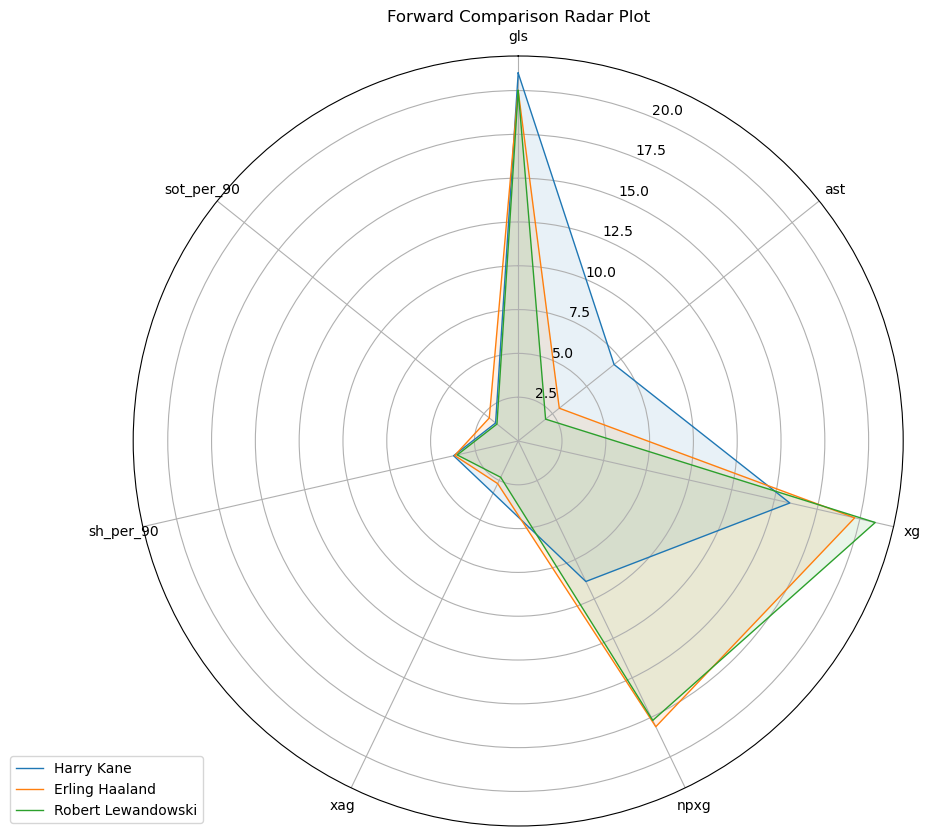

In [179]:
# Create radar plot comparing Harry Kane with other top forwards
import matplotlib.pyplot as plt
import numpy as np

def create_radar_plot(players, metrics):
    # Get data for selected players and metrics
    plot_data = final_merged_df[final_merged_df['player_x'].isin(players)][['player_x'] + metrics].set_index('player_x')
    
    # Number of variables
    num_vars = len(metrics)
    
    # Compute angle for each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    # Initialize the spider plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Plot data
    for idx, player in enumerate(players):
        values = plot_data.loc[player].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=player)
        ax.fill(angles, values, alpha=0.1)
    
    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw axis lines for each angle and label
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title("Forward Comparison Radar Plot")
    
    return fig

# Select metrics for comparison
comparison_metrics = ['gls', 'ast', 'xg', 'npxg', 'xag', 'sh_per_90', 'sot_per_90']

# Select players to compare
players_to_compare = ['Harry Kane', 'Erling Haaland', 'Robert Lewandowski']

# Create and display the radar plot
radar_plot = create_radar_plot(players_to_compare, comparison_metrics)
plt.show()


# Building a Player Recommendation Web App

## Overview
We'll create a web app that:
1. Recommends similar players based on statistical similarities
2. Visualizes player comparisons using pizza/radar plots
3. Predicts market values using ML models

## Key Components Needed:

### 1. Player Similarity Engine
- Calculate similarity scores between players using metrics like:
  - Performance stats (goals, assists, xG, etc.)
  - Physical attributes (height, age)
  - Position and playing style
- Use techniques like cosine similarity or k-nearest neighbors

### 2. Visualization Module  
- Interactive radar/pizza plots comparing players
- Performance trend charts
- Position-specific stat comparisons

### 3. Market Value Predictor
- ML model trained on features like:
  - Age, contract length
  - Performance metrics
  - League level
  - Historical transfer values

### 4. Web Interface
- Player search and filtering
- Interactive visualizations
- Recommendation results display
- Value prediction interface

## Tech Stack:
- Backend: Flask/FastAPI
- Frontend: Streamlit/Dash
- ML: Scikit-learn
- Viz: Plotly


In [ ]:
# Import required libraries
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def create_player_app():
    st.title('Football Player Recommendation System')
    
    # Sidebar filters
    st.sidebar.header('Filters')
    
    # Position filter
    positions = sorted(merged_df['main_position'].unique())
    selected_position = st.sidebar.selectbox('Select Position', positions)
    
    # Value range filter
    max_value = merged_df['value'].str.replace('€','').str.replace('m','').astype(float).max()
    value_range = st.sidebar.slider('Market Value Range (€M)', 
                                  min_value=0.0,
                                  max_value=float(max_value),
                                  value=(0.0, float(max_value)))
    
    # Age filter
    max_age = (pd.to_datetime('now') - pd.to_datetime(merged_df['date_of_birth'], format='%y%m%d')).dt.days/365
    age_range = st.sidebar.slider('Age Range',
                                min_value=int(max_age.min()),
                                max_value=int(max_age.max()),
                                value=(int(max_age.min()), int(max_age.max())))
    
    # Filter dataframe based on selections
    filtered_df = merged_df[
        (merged_df['main_position'] == selected_position) &
        (merged_df['value'].str.replace('€','').str.replace('m','').astype(float).between(value_range[0], value_range[1])) &
        ((pd.to_datetime('now') - pd.to_datetime(merged_df['date_of_birth'], format='%y%m%d')).dt.days/365).between(age_range[0], age_range[1])
    ]
    
    # Player selection
    selected_player = st.selectbox('Select Player', filtered_df['player'].unique())
    
    if selected_player:
        # Get player data
        player_data = filtered_df[filtered_df['player'] == selected_player].iloc[0]
        
        # Display player info
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Current Club", player_data['current_club'])
        with col2:
            st.metric("Market Value", player_data['value'])
        with col3:
            st.metric("Contract Until", player_data['contract_expiry'])
            
        # Find similar players
        # Prepare numerical features for similarity calculation
        features = ['value', 'height', 'date_of_birth']
        
        # Create feature matrix
        X = filtered_df[features].copy()
        X['value'] = X['value'].str.replace('€','').str.replace('m','').astype(float)
        X['height'] = X['height'].str.replace(' m','').astype(float)
        
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Calculate similarity
        similarities = cosine_similarity(X_scaled)
        similar_indices = similarities[filtered_df.index[filtered_df['player'] == selected_player].values[0]].argsort()[::-1][1:6]
        
        # Display similar players
        st.subheader('Similar Players')
        similar_players = filtered_df.iloc[similar_indices]
        st.dataframe(similar_players[['player', 'current_club', 'value', 'contract_expiry']])

# Run the app
if __name__ == "__main__":
    create_player_app()


In [66]:
# Drop duplicate rows
market_df.drop_duplicates(inplace=True)

# Reset index after dropping duplicates
market_df.reset_index(drop=True, inplace=True)

print(f"Shape after dropping duplicates: {market_df.shape}")


Shape after dropping duplicates: (2859, 9)


In [17]:
!pip install aiohttp tqdm lxml

In [38]:
transfermarkt_df.to_sql(name='market',con=engine,if_exists='replace',index=False)

464

In [183]:
performance_df.head()

,unique_id,mp,starts,min,nineties,gls,ast,g_plus_a,g_minus_pk,pk,pkatt,crdy,crdr,xg,npxg,xag,npxg_plus_xag,prgc,prgp,prgr,g_plus_a_minus_pk,xg_plus_xag,matches,player,squad,comp,birth_date,tkl,tklw,def_3rd,mid_3rd,att_3rd,att,tkl_pcnt,lost,blocks,pass,int,tkl_plus_int,clr,err,sh,sot,sot_pcnt,sh_per_90,sot_per_90,g_per_sh,g_per_sot,dist,fk,npxg_per_sh,g_minus_xg,np:g_minus_xg,cmp,cmp_pcnt,totdist,prgdist,xa,a_minus_xag,kp,pass_into_final_third,ppa,crspa,touches,def_pen,att_pen,live,succ,succ_pcnt,tkld,tkld_pcnt,carries,carries_into_final_third,cpa,mis,dis,rec,born_date
0,aaron_000104,4,1,117,1.30,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1,10,6,0.00,0.00,0,Max Aarons,"Bournemouth, Valencia","eng Premier League, es La Liga",000104,3,3,1,2,0,2,100.00,0,4,3,1,4,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,64,78.60,1109,409,0.00,0.00,0,9,0,0,97,2,0,97,1,25.00,1,25.00,51,0,0,2,1,51,2000-01-04
1,abaja_030512,1,1,65,0.70,0,0,0,0,0,0,1,0,0.10,0.10,0.00,0.10,3,2,3,0.00,0.10,0,Rodrigo Abajas,Valencia,es La Liga,030512,3,2,2,1,0,3,100.00,0,1,1,1,4,0,0,1,0,0.00,1.38,0.00,0.00,0.00,24.50,0,0.07,-0.10,-0.10,17,58.60,268,110,0.00,0.00,0,0,0,0,36,1,1,36,1,100.00,0,0.00,13,2,1,0,2,16,2003-05-12
2,abank_040116,6,0,88,1.00,0,0,0,0,0,0,1,0,0.10,0.10,0.00,0.10,3,4,1,0.00,0.06,0,James Abankwah,Udinese,it Serie A,040116,4,2,4,0,0,3,66.70,1,2,1,1,5,3,0,1,0,0.00,1.02,0.00,0.00,0.00,15.00,0,0.06,-0.10,-0.10,36,78.30,614,206,0.00,0.00,0,2,0,0,65,8,2,65,0,0.00,0,0.00,29,1,1,1,3,34,2004-01-16
3,abdal_060405,1,0,3,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1,0,0,0.00,0.00,0,Keyliane Abdallah,Marseille,fr Ligue 1,060405,1,1,1,0,0,1,100.00,0,0,0,0,1,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,2,100.00,41,0,0.00,0.00,0,0,0,0,4,0,0,4,0,0.00,0,0.00,1,0,0,1,0,3,2006-04-05
4,abdel_870928,12,11,976,10.80,0,0,0,0,0,0,2,0,0.20,0.20,0.10,0.40,4,22,3,0.00,0.03,0,Yunis Abdelhamid,Saint-Étienne,fr Ligue 1,870928,17,11,15,2,0,16,62.50,6,24,7,13,30,56,1,2,1,50.00,0.18,0.09,0.00,0.00,10.80,0,0.12,-0.20,-0.20,432,86.70,7860,2367,0.30,-0.10,2,27,0,0,630,124,7,630,3,50.00,3,50.00,319,1,0,8,3,390,1987-09-28


##### Missing Values

##### EDA Market Value

Average market Value by main position of players

In [185]:
market_df.groupby('main_position')['value'].mean().sort_values(ascending=False)

main_position
Attacking Midfield   19966165.41
Right Winger         18935472.97
Left Winger          17230612.24
Centre-Forward       14994172.93
Defensive Midfield   13656882.02
Central Midfield     13485304.05
Centre-Back          12441811.41
Second Striker       10815000.00
Left Midfield        10481818.18
Left-Back            10163081.40
Right-Back            9239322.92
Right Midfield        9059090.91
Goalkeeper            7650882.35
Name: value, dtype: float64

As expected players who play up top of the field have on average a higher market value than the others.

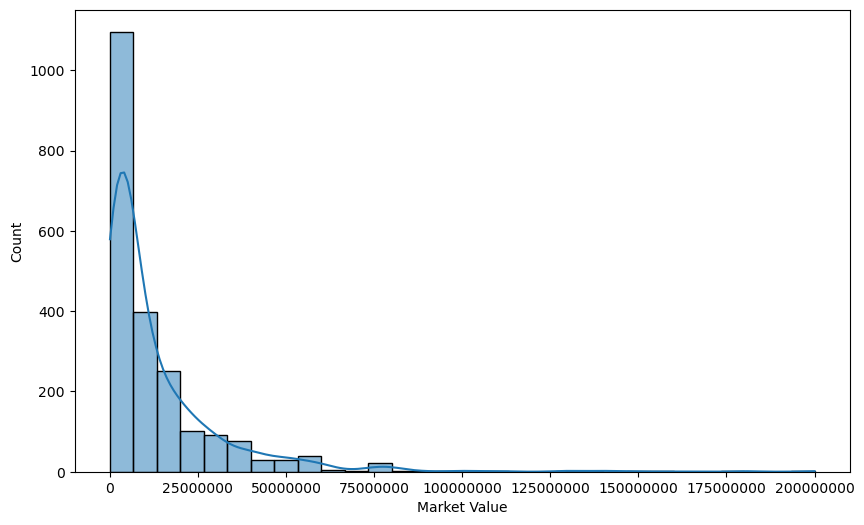

In [184]:
plt.figure(figsize=(10,6))
sns.histplot(data=market_df,x='value',bins=30,kde=True)
plt.ticklabel_format(style='plain')
plt.xlabel('Market Value')
plt.show()

Most of the current players in the big 5 European leagues have a market value less than 50m euros.

Create age column from date_of_birth column

In [199]:
# Function to calculate age
def calculate_age(dob):
    """Calculate age from date of birth."""
    if pd.isna(dob):  # Handle missing values
        return None
    today = datetime.now()
    age = today.year - dob.year
    # Adjust if the birthday hasn't occurred yet this year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

# Apply the function to create the 'age' column
market_df['age'] = market_df['date_of_birth'].apply(calculate_age)

market_df.head()

,player_id,player,contract_expiry,main_position,value,height,current_club,date_of_birth,league,days_until_expiry,age
4,abdel_870928,Yunis Abdelhamid,2025-06-30,Centre-Back,500000.00,190.00,Saint-Étienne,1987-09-28,Ligue 1,120.00,37
5,abdel_991117,Himad Abdelli,2026-06-30,Attacking Midfield,5000000.00,185.00,Angers SCO,1999-11-17,Ligue 1,485.00,25
6,abdi_931220,Ali Abdi,2027-06-30,Left-Back,3000000.00,183.00,OGC Nice,1993-12-20,Ligue 1,850.00,31
7,abdul_990718,Saud Abdulhamid,2028-06-30,Right-Back,4000000.00,175.00,AS Roma,1999-07-18,Serie A,1216.00,25
10,ablin_030328,Matthis Abline,2028-06-30,Centre-Forward,9000000.00,182.00,FC Nantes,2003-03-28,Ligue 1,1216.00,21


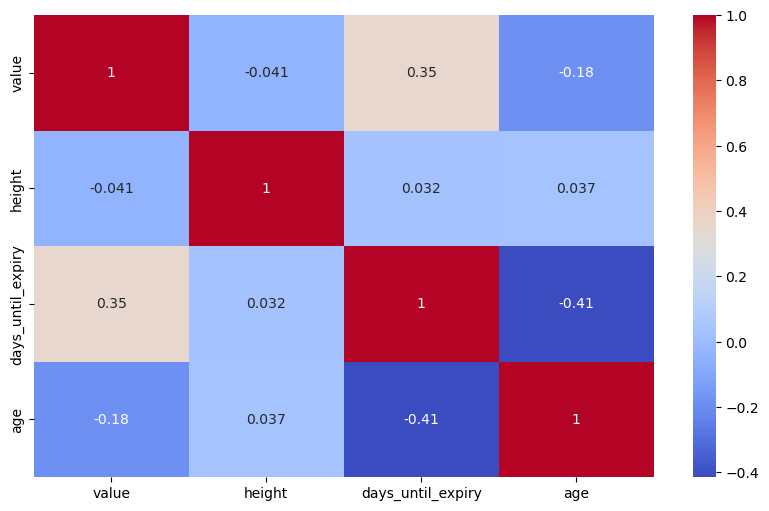

In [200]:
plt.figure(figsize=(10,6))
sns.heatmap(market_df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

Analyze how age affects a player's market value and performance

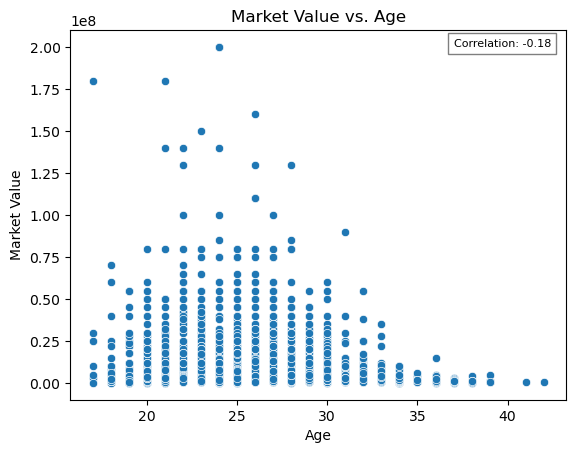

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient
correlation = market_df['age'].corr(market_df['value'])

# Create the scatter plot
sns.scatterplot(x='age', y='value', data=market_df)
plt.title('Market Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Market Value')

# Add the correlation coefficient as text to the plot
plt.text(x=market_df['age'].max() - 5, y=market_df['value'].max() - 5, s=f'Correlation: {correlation:.2f}', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()

The scatter plot shows the relationship between a football player's age and their market value in Euros.

Peak Value Age: Players tend to reach their highest market values in their early to mid-twenties. The most valuable player in the dataset appears to be around 24 years old with a value of €200 million.

Value Decline: There's a clear downward trend in market value as players age, particularly after 30. By age 35, very few players maintain significant market values.

Value Distribution: There's a wide range of values for players in the 20-30 age bracket, with most concentrated in the €10-50 million range.

Value Ceiling: Younger players (18-25) have the highest potential ceiling for market value, with several players valued above €100 million.

Career Trajectory: The overall shape illustrates the typical career value trajectory in football - rising rapidly in early career, peaking in the mid-20s, and then declining gradually after 30.

In [202]:
market_df[['age','value']].corr()

,age,value
age,1.00,-0.18
value,-0.18,1.00
